# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import shap  # For plotting feature importance


# Load the detaset

In [2]:
df = pd.read_csv("/content/sales.csv")

In [3]:
df.head()

,sale_id,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points
0,1,A,New York,Member,Male,Shampoo,Personal Care,5.50,3,1.16,17.66,1
1,2,B,Los Angeles,Normal,Female,Notebook,Stationery,2.75,10,1.93,29.43,0
2,3,A,New York,Member,Female,Apple,Fruits,1.20,15,1.26,19.26,1
3,4,A,Chicago,Normal,Male,Detergent,Household,7.80,5,2.73,41.73,0
4,5,B,Los Angeles,Member,Female,Orange Juice,Beverages,3.50,7,1.72,26.22,2


In [4]:
df.isnull().sum()

,0
sale_id,0
branch,0
city,0
customer_type,0
gender,0
product_name,0
product_category,0
unit_price,0
quantity,0
tax,0


In [5]:
df.describe()

,sale_id,unit_price,quantity,tax,total_price,reward_points
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,10.836110,10.337000,7.758010,118.583900,6.057000
std,288.819436,5.775924,6.029908,6.538066,99.936441,9.350464
min,1.000000,1.020000,1.000000,0.080000,1.210000,0.000000
25%,250.750000,5.867500,5.000000,2.510000,38.380000,0.000000
50%,500.500000,10.615000,10.000000,5.870000,89.705000,0.000000
75%,750.250000,15.882500,16.000000,11.522500,176.072500,10.000000
max,1000.000000,20.980000,20.000000,28.390000,433.990000,43.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sale_id           1000 non-null   int64  
 1   branch            1000 non-null   object 
 2   city              1000 non-null   object 
 3   customer_type     1000 non-null   object 
 4   gender            1000 non-null   object 
 5   product_name      1000 non-null   object 
 6   product_category  1000 non-null   object 
 7   unit_price        1000 non-null   float64
 8   quantity          1000 non-null   int64  
 9   tax               1000 non-null   float64
 10  total_price       1000 non-null   float64
 11  reward_points     1000 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB


In [7]:
df.duplicated().sum()

0

# Categorical Data Visualization

In [8]:
df.columns

Index(['sale_id', 'branch', 'city', 'customer_type', 'gender', 'product_name',
       'product_category', 'unit_price', 'quantity', 'tax', 'total_price',
       'reward_points'],
      dtype='object')

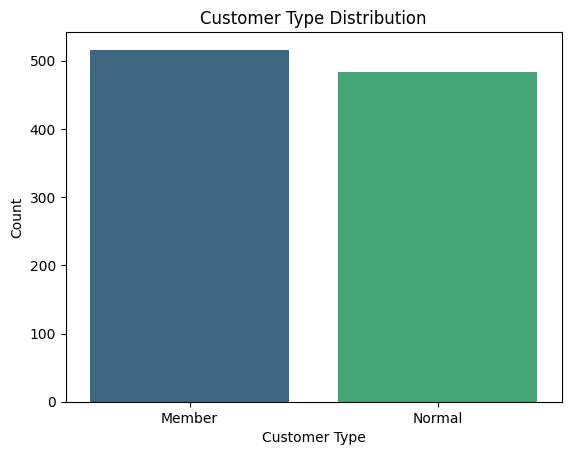

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Count of customers by type
sns.countplot(x='customer_type', data=df, palette='viridis')
plt.title('Customer Type Distribution')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()


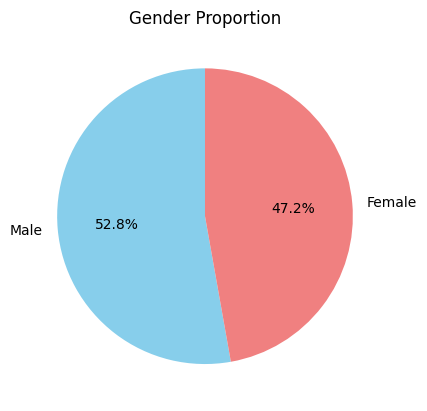

In [10]:
# Proportion of genders
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Gender Proportion')
plt.ylabel('')
plt.show()


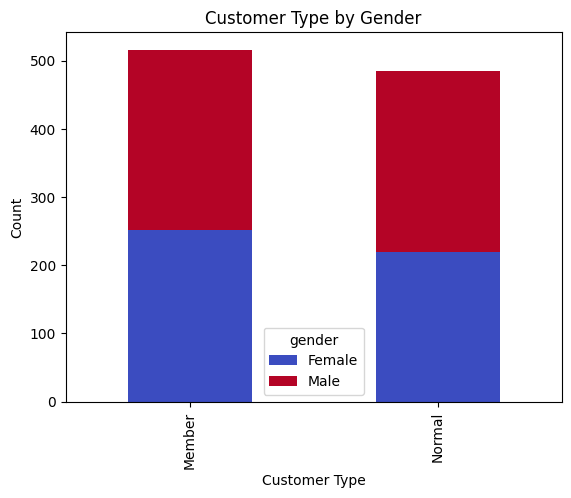

In [11]:
# Customer Type vs Gender
ct_gender = pd.crosstab(df['customer_type'], df['gender'])
ct_gender.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Customer Type by Gender')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()


# Numerical Data Visualization

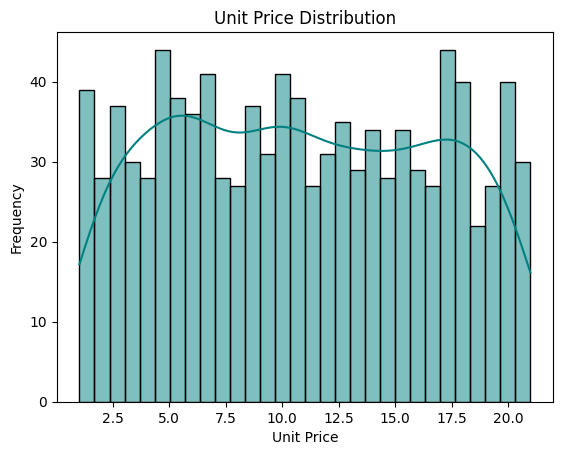

In [12]:
#Distribution of Unit Price
sns.histplot(df['unit_price'], kde=True, bins=30, color='teal')
plt.title('Unit Price Distribution')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()


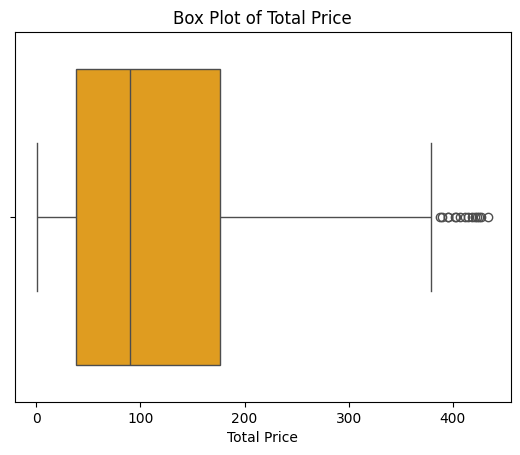

In [13]:
# Box Plot for Total Price
sns.boxplot(x=df['total_price'], color='orange')
plt.title('Box Plot of Total Price')
plt.xlabel('Total Price')
plt.show()


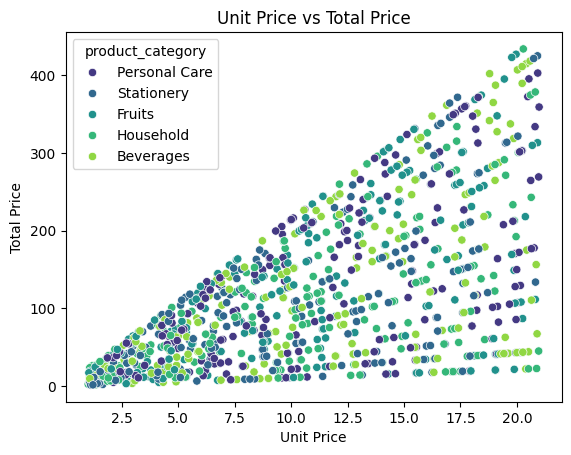

In [14]:
#Unit Price vs Total Price
sns.scatterplot(x='unit_price', y='total_price', data=df, hue='product_category', palette='viridis')
plt.title('Unit Price vs Total Price')
plt.xlabel('Unit Price')
plt.ylabel('Total Price')
plt.show()


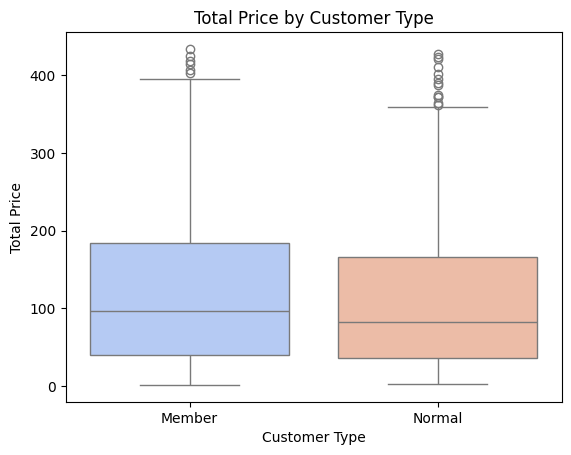

In [15]:
#Total Price by Customer Type
sns.boxplot(x='customer_type', y='total_price', data=df, palette='coolwarm')
plt.title('Total Price by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Price')
plt.show()


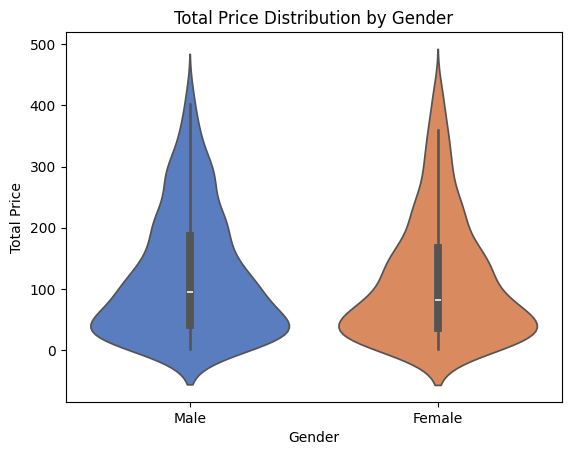

In [16]:
# Total Price by Gender
sns.violinplot(x='gender', y='total_price', data=df, palette='muted')
plt.title('Total Price Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Price')
plt.show()


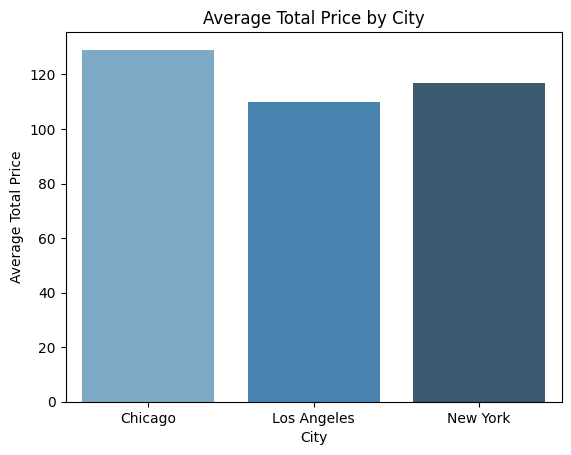

In [17]:
#Average Total Price by City
avg_price_city = df.groupby('city')['total_price'].mean().reset_index()
sns.barplot(x='city', y='total_price', data=avg_price_city, palette='Blues_d')
plt.title('Average Total Price by City')
plt.xlabel('City')
plt.ylabel('Average Total Price')
plt.show()


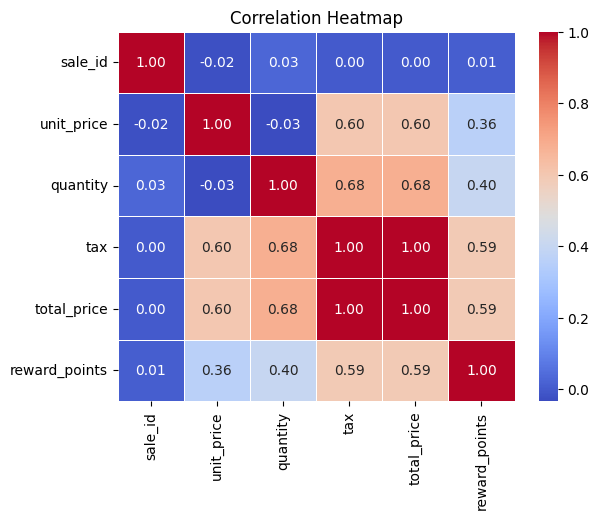

In [18]:
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the numerical column to check for outliers
def detect_and_remove_outliers(df, column_name):
    # Plotting the box plot
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column_name])
    plt.title(f'Box Plot of {column_name}')
    plt.ylabel(column_name)
    plt.show()

    # Calculate the first quartile (Q1), third quartile (Q3), and the interquartile range (IQR)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Find the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    # Verify that the dataset size has reduced
    print(f"Original DataFrame Size: {df.shape}")
    print(f"Cleaned DataFrame Size: {df_cleaned.shape}")

    return df_cleaned
    df_cleaned = detect_and_remove_outliers(df, 'Total_Price_After_Tax')


In [20]:
df.columns

Index(['sale_id', 'branch', 'city', 'customer_type', 'gender', 'product_name',
       'product_category', 'unit_price', 'quantity', 'tax', 'total_price',
       'reward_points'],
      dtype='object')

In [21]:
df = df.drop(columns=['sale_id'])

# Encoding

In [22]:
encoder = LabelEncoder()

label_mappings = {}

for col in df.select_dtypes('object'):
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: branch
0 -> A
1 -> B

Column: city
0 -> Chicago
1 -> Los Angeles
2 -> New York

Column: customer_type
0 -> Member
1 -> Normal

Column: gender
0 -> Female
1 -> Male

Column: product_name
0 -> Apple
1 -> Detergent
2 -> Notebook
3 -> Orange Juice
4 -> Shampoo

Column: product_category
0 -> Beverages
1 -> Fruits
2 -> Household
3 -> Personal Care
4 -> Stationery



In [23]:
df

,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points
0,0,2,0,1,4,3,5.50,3,1.16,17.66,1
1,1,1,1,0,2,4,2.75,10,1.93,29.43,0
2,0,2,0,0,0,1,1.20,15,1.26,19.26,1
3,0,0,1,1,1,2,7.80,5,2.73,41.73,0
4,1,1,0,0,3,0,3.50,7,1.72,26.22,2
...,...,...,...,...,...,...,...,...,...,...,...
995,0,2,0,0,4,4,1.55,11,1.19,18.24,1
996,0,2,0,1,1,3,2.44,7,1.20,18.28,1
997,0,2,0,0,4,4,17.92,2,2.51,38.35,3
998,0,2,0,0,4,0,17.41,4,4.87,74.51,7


In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('total_price',axis = 1)
y = df['total_price']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(800, 10) (200, 10)


# Feature Scaling

In [26]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
knn = KNeighborsRegressor()
knn_model = knn.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test)

In [28]:
knn_mse = mean_squared_error(y_test, y_pred)
knn_r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {knn_mse}")
print(f"R2 Score: {knn_r2}")

Mean Squared Error: 67126.01971123999
R2 Score: -4.993690649871192


# Models

In [29]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting (XGBoost)': GradientBoostingRegressor(),
    'Decision Trees': DecisionTreeRegressor(),
    'SVR': SVR()
}

# Training models

In [30]:
# Training models and evaluating them
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae}
    print(f"{name} - MSE: {mse:.2f}, MAE: {mae:.2f}")


Linear Regression - MSE: 0.00, MAE: 0.04
Random Forest Regressor - MSE: 1.13, MAE: 0.39
Gradient Boosting (XGBoost) - MSE: 1.47, MAE: 0.74
Decision Trees - MSE: 2.50, MAE: 0.68
SVR - MSE: 6163.05, MAE: 52.87


# Model Comparison

In [31]:
# Model Comparison
print("\nModel Performance Comparison:")
for name, metrics in results.items():
    print(f"{name} - MSE: {metrics['MSE']:.2f}, MAE: {metrics['MAE']:.2f}")


Model Performance Comparison:
Linear Regression - MSE: 0.00, MAE: 0.04
Random Forest Regressor - MSE: 1.13, MAE: 0.39
Gradient Boosting (XGBoost) - MSE: 1.47, MAE: 0.74
Decision Trees - MSE: 2.50, MAE: 0.68
SVR - MSE: 6163.05, MAE: 52.87
